`homework_titanic_agg_251121.ipynb`에 작성하세요. # 84

## 데이터분석

#### 01. 클래스별 생존률

**설명**: `Pclass`별로 `Survived`의 평균을 구하면 생존률이 된다.

> Q1. 승객의 Pclass별로 생존률(Survived 평균)을 구하라. 생존률은 소수점 두 자리까지 출력하라.

<img width="327" height="143" alt="Image" src="https://github.com/user-attachments/assets/0cf34749-b112-45a5-93da-8cb1d95b0e24" />

#### 02. 성별에 따른 평균 나이와 평균 요금

**설명**: `Sex` 컬럼을 기준으로 `Age`, `Fare` 평균을 집계한다.

> Q2. 성별(Sex)에 따라 평균 나이(Age)와 평균 요금(Fare)을 구하라.

<img width="206" height="142" alt="Image" src="https://github.com/user-attachments/assets/d743937a-5b33-44c3-867a-621613133741" />

#### 03. 출항지별 승객 수와 생존자 수

**설명**: `Embarked` 컬럼을 기준으로 총 인원 수와 생존자 수(`Survived == 1`)를 집계.

> Q3. 출항지(Embarked)별 전체 승객 수와 생존자 수를 구하라.

<img width="414" height="183" alt="Image" src="https://github.com/user-attachments/assets/32c38d6e-bc25-4d4d-9ced-c9590850e79b" />

#### 04. 나이 구간별 생존률

**설명**: `Age`를 구간으로 나누고 그 구간별로 생존률을 확인한다. `pd.cut()` 사용.

> Q4. 나이를 다음 구간으로 나누고 각 구간의 생존률을 구하라
> 구간: `0~10`, `10~20`, `20~30`, `30~40`, `40~50`, `50~`

<img width="308" height="204" alt="Image" src="https://github.com/user-attachments/assets/23763727-3726-4af9-8fb3-28f504bbeb24" />

#### 05. 동반 가족 수에 따른 평균 생존률

**설명**: `SibSp`(형제/배우자 수)와 `Parch`(부모/자녀 수)를 기준으로 생존률(Survived 평균)을 확인하는 피벗 테이블 작성.

> Q5. 형제/배우자 수(SibSp)를 행으로, 부모/자녀 수(Parch)를 열로 하여 생존률(Survived 평균)을 피벗 테이블 형태로 구하라.

<img width="422" height="315" alt="Image" src="https://github.com/user-attachments/assets/74be88d0-1ab1-43e8-a86f-330cfadb2277" />


## 시각화
### 1.titanic 승객의 생존자/사망자별 승객등급 분포를 작성하세요. 
(matplotlib의 pie함수)

<img width="729" height="313" alt="Image" src="https://github.com/user-attachments/assets/3d9cb0a1-084e-44b0-96b8-efd1aac885e9" />

### 2. 객실등급별, 성별, 연령그룹별 생존율을 시각화 하세요.

<img width="1311" height="439" alt="Image" src="https://github.com/user-attachments/assets/c8065972-c2ce-4f61-a0c3-0a20764467a4" />

연령 그룹 (Age_cat) | 연령 범위 (Age)
-- | --
Baby | 0 ~ 5
Child | 6 ~ 12
Teenager | 13 ~ 18
Student | 19 ~ 25
Young Adult | 26 ~ 35
Adult | 36 ~ 60
Elderly | 61 이상


# 1. 클래스별 생존율 (Q1)

In [1]:
import pandas as pd

# 예시: Titanic 데이터 불러오기
titanic = pd.read_csv("data/titanic.csv")

# Pclass별 생존률
pclass_survival = titanic.groupby('Pclass')['Survived'].mean().round(2)
print(pclass_survival)


Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64


# 2. 성별에 따른 평균 나이와 평균 요금 (Q2)

In [2]:
sex_stats = titanic.groupby('Sex')[['Age', 'Fare']].mean()
print(sex_stats)

              Age       Fare
Sex                         
female  27.915709  44.479818
male    30.726645  25.523893


# 3. 출항지별 승객 수와 생존자 수 (Q3)

In [3]:
# 전체 승객 수
embarked_count = titanic.groupby('Embarked')['PassengerId'].count()

# 생존자 수
embarked_survived = titanic[titanic['Survived']==1].groupby('Embarked')['PassengerId'].count()

# 합쳐서 확인
embarked_summary = pd.DataFrame({
    'Total': embarked_count,
    'Survived': embarked_survived
})
print(embarked_summary)


          Total  Survived
Embarked                 
C           168        93
Q            77        30
S           644       217


# 4. 나이 구간별 생존률 (Q4)

In [4]:
age_bins = [0, 10, 20, 30, 40, 50, 150]  # 50 이상은 모두 150까지
age_labels = ['0~10','10~20','20~30','30~40','40~50','50~']

titanic['Age_group'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

age_survival = titanic.groupby('Age_group')['Survived'].mean().round(2)
print(age_survival)


Age_group
0~10     0.59
10~20    0.38
20~30    0.37
30~40    0.45
40~50    0.38
50~      0.34
Name: Survived, dtype: float64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26392\3990384776.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('Age_group')['Survived'].mean().round(2)


# 5. 동반 가족 수에 따른 평균 생존률 (Q5)

In [5]:
family_survival = titanic.pivot_table(
    index='SibSp', 
    columns='Parch', 
    values='Survived', 
    aggfunc='mean'
).round(2)

print(family_survival)


Parch     0     1     2     3    4     5    6
SibSp                                        
0      0.30  0.66  0.72  1.00  0.0  0.00  NaN
1      0.52  0.60  0.63  0.33  0.0  0.33  0.0
2      0.25  0.86  0.50  1.00  NaN   NaN  NaN
3      1.00  0.00  0.29   NaN  NaN   NaN  NaN
4       NaN  0.00  0.33   NaN  NaN   NaN  NaN
5       NaN   NaN  0.00   NaN  NaN   NaN  NaN
8       NaN   NaN  0.00   NaN  NaN   NaN  NaN


# 시각화

## 1. 생존자/사망자별 승객 등급 분포 (pie chart)

In [7]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 8.9 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.3 MB/s  0:00:01
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
 

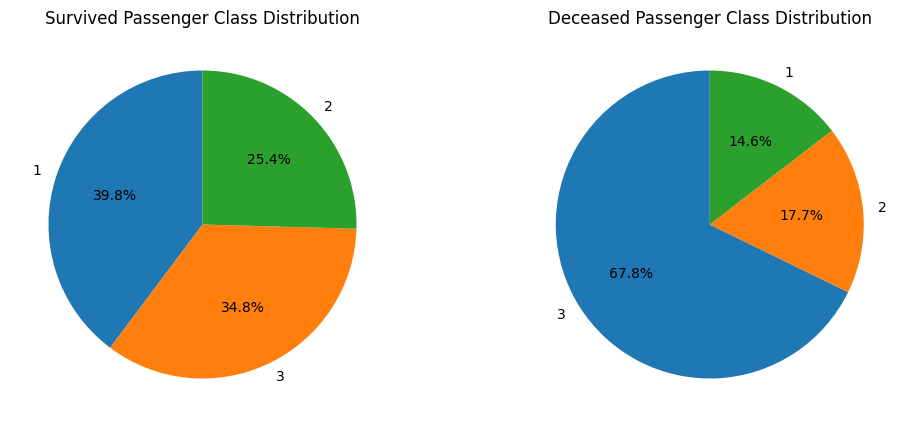

In [8]:
import matplotlib.pyplot as plt

# Survived별 Pclass 분포
survived_classes = titanic[titanic['Survived']==1]['Pclass'].value_counts()
died_classes = titanic[titanic['Survived']==0]['Pclass'].value_counts()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.pie(survived_classes, labels=survived_classes.index, autopct='%1.1f%%', startangle=90)
plt.title('Survived Passenger Class Distribution')

plt.subplot(1,2,2)
plt.pie(died_classes, labels=died_classes.index, autopct='%1.1f%%', startangle=90)
plt.title('Deceased Passenger Class Distribution')

plt.show()


## 2. 객실등급별, 성별, 연령 그룹별 생존율 시각화

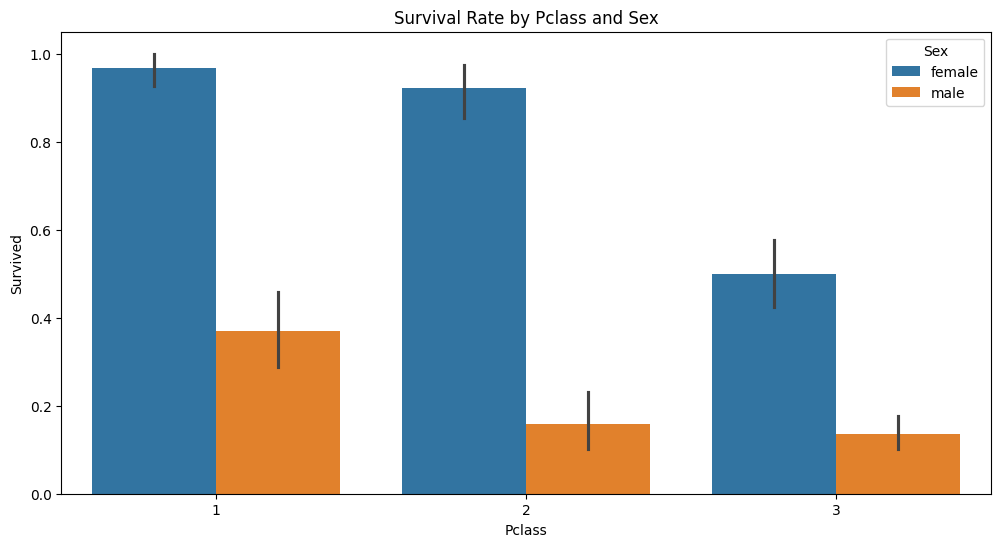

C:\Users\Playdata\AppData\Local\Temp\ipykernel_2252\3001277130.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = titanic.pivot_table(index='Age_cat', columns=['Pclass','Sex'], values='Survived', aggfunc='mean')


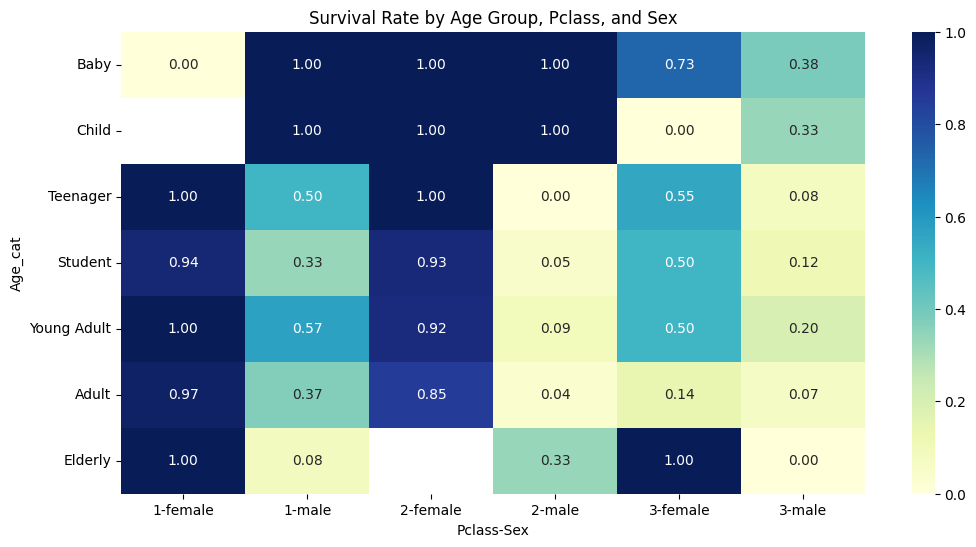

In [ ]:
import seaborn as sns

# 연령 그룹 카테고리 생성
age_bins = [0, 5, 12, 18, 25, 35, 60, 150]
age_labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic['Age_cat'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

# 시각화: 객실등급, 성별, 연령그룹별 생존율
plt.figure(figsize=(12,6))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

# 연령 그룹까지 포함한 히트맵
pivot = titanic.pivot_table(index='Age_cat', columns=['Pclass','Sex'], values='Survived', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Survival Rate by Age Group, Pclass, and Sex')
plt.show()
